# Bài tập 1


Đinh Vũ Gia Hân - 22127098

---

# Import necessary library

In [1]:
import numpy as np

# Generalization Error

The modified Hoeffding Inequality is defined as:
$$P[|E_{in}(g) - E_{out}(g)| > \epsilon] \leq 2M\epsilon^{-2\epsilon^2N}$$

Suppose the right side is at most a:
\begin{align}
    2M\epsilon^{-2\epsilon^2N} &\leq a \\
    \epsilon^{-2\epsilon^2N} &\leq \frac{a}{2M} \\
    -2\epsilon^2N &\leq \ln \left( \frac{a}{2M} \right) \\
    N &\geq \frac{-1}{2\epsilon^2} \ln \left( \frac{a}{2M} \right)
\end{align}

So, if we want the probability bound $2M\epsilon^{-2\epsilon^2N}$ is at most 0.03, the least number of examples $N$ must satisfy the following condition:
$$N \geq \frac{-1}{2\epsilon^2} \ln \left( \frac{0.03}{2M} \right)$$

In [2]:
def compute_least_num_N(a, epsilon, M):
    """
    Compute the lest number of examples N needed to ensure that with probability 
    at least a when epsilon and M are given.

    Parameters
    ----------
    a : float
        The upper bound on the probability of the event that the generalization error
    epsilon : float
        The desired precision.
    M: int
        The number of hypotheses in H.

    Returns
    ----------
    N : float
        The least number of examples
    """
    # compute N follow the formula
    N = (-1 / (2 * epsilon**2)) * np.log(a / (2 * M))
    return N

## 1. 

In [3]:
# print result of N
print("When a = 0.03, M = 1, and epsilon = 0.05, the least number of N is", compute_least_num_N(0.03, 0.05, 1).round(0))

When a = 0.03, M = 1, and epsilon = 0.05, the least number of N is 840.0


**Question 1:** The result is closest to the answer: [b] 1000

## 2.

In [4]:
# print result of N
print("When a = 0.03, M = 10, and epsilon = 0.05, the least number of N is", compute_least_num_N(0.03, 0.05, 10).round(0))

When a = 0.03, M = 10, and epsilon = 0.05, the least number of N is 1300.0


**Question 2:** The result is closest to the answer: [c] 1500

## 3.

In [5]:
# print result of N
print("When a = 0.03, M = 100, and epsilon = 0.05, the least number of N is", compute_least_num_N(0.03, 0.05, 100).round(0))

When a = 0.03, M = 100, and epsilon = 0.05, the least number of N is 1761.0


**Question 3:** The result is closest to the answer: [d] 2000

# Break Point

## 4.

This answer is referenced from [1]

In $\R^2$, the break point is 4 because we cannot seperate them by a straight line when there are 2 pairs of red and blue points diagonally opposite each other. (The left figure)

To make this in $\R^3$, for any arrangement of 4 points, it is possible to label them in all possible ways such that a plane can seperate them accordingly (the right figure). Thus, the break point for a 3D perceptron is at least 5.

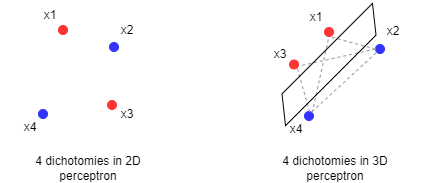

We will now desmonstrate whether the 5 points can be shattered by a 3D perceptron. 

Suppose we have a set of 5 points and no 4 points line on the same plane. Among these 5 points, we can always construct a tetrahedron from 4 points and leave the fifth point outside (the left figure). This point will always fall within the "shadow" of one of the tetrahedron's sides.

If we chan x4 and x5 to red, we will get a plane that separate x4 from x1, x2, x3 (the right figure). This mean that x5 must have the same color with x1, x2, x3 and must be blue. But here it is red so we can conclude that there is no plane can seperate the red point from the blue ones due to the plane constraint. Hence, a 3D perceptron cannot shatter 5 points. 

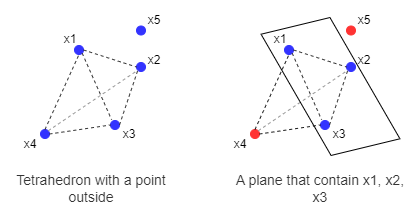

**Question 4:** The correct answer is: [b] 5

#  Growth Function

As shown in class, the growth function counts the most dichotomies on any N points, and it must satisfies:
$$m_{\mathcal{H}}(N) \leq 2^N$$

A valid growth function must either:
- No break point: $m_{\mathcal{H}}(N) = 2^N$
- Any break point: $m_{\mathcal{H}}(N)$ is polynomial in N

Therefore, to check whether a formula is growth function, it must satisfy the above conditions.

## 5.

This answer is referenced from [1]

**i)** $1 + N$ is first order polynomial. Because $1 + N$ grows linearly while $2^N$ grows exponentially, it always smaller than or equal to $2^N$. Therefore, it is a growth function.

**ii)** 
$\begin{align}
1 + N + \binom{N}{2} &= 1 + N + \frac{N!}{2! \times (N - 2)!} \\
&= 1 + N + \frac{N \times (N - 1)}{2} \\
&= 1 + N + \frac{N^2 - N}{2} \\
&= 1 + \frac{N}{2} + \frac{N^2}{2}
\end{align}$

This formula is quadratic polynomial. Because $ 1 + \frac{N}{2} + \frac{N^2}{2}$ grows quadratically while $2^N$ grows exponentially, it always smaller than or equal to $2^N$. Therefore, it is a growth function.

**iii)**
According to Newton's binomial, we have:
$\begin{align}
2^{\lfloor \sqrt{N} \rfloor} &= {(1 + 1)}^{\lfloor \sqrt{N} \rfloor} \\
&= \sum_{i = 0}^{\lfloor \sqrt{N} \rfloor} \binom{\lfloor \sqrt{N} \rfloor}{i} \times 1^{\lfloor \sqrt{N} \rfloor - i} \times 1^i \\
&= \sum_{i = 0}^{\lfloor \sqrt{N} \rfloor} \binom{\lfloor \sqrt{N} \rfloor}{i} \\
&= \sum_{i = 1}^{\lfloor \sqrt{N} \rfloor} \binom{\lfloor \sqrt{N} \rfloor}{i} + 1\\
\end{align}$

With i > 0 and a < b, we have that $\binom{a}{i} < \binom{b}{i}$, so:

$\sum_{i = 1}^{\lfloor \sqrt{N} \rfloor} \binom{N}{i} \geq \sum_{i = 1}^{\lfloor \sqrt{N} \rfloor} \binom{\lfloor \sqrt{N} \rfloor}{i} - 1 = 2^{\lfloor \sqrt{N} \rfloor} - 1$

Because $2^{\lfloor \sqrt{N} \rfloor} - 1$ is non-polynomial, nor equal to $2^N$. Hence, it is not a valid growth function.

**iv)** $2^{\lfloor N/2 \rfloor}$ is not polynomial in N, nor equal to $2^N$. Therefore, it is impossible growth function.

**v)** $2^N$ qualifies the no break point case, so it is a possible growth fuction

**Question 5:** The correct answer is [b] i, ii, v

# Fun with Intervals

The 2-interval learning model involves functions that classify points on the real number line based on wether they fall within two specific intervals

## 6.

Accroding to the topic, We have a 2-interval model with two label -1 and +1. To find the smallest breakpoint for this hypothesis, let's check the two following cases:
- For 4 points, we can generate 16 dichotomies and the 2-interval hypothesis set can shatter 4 points.

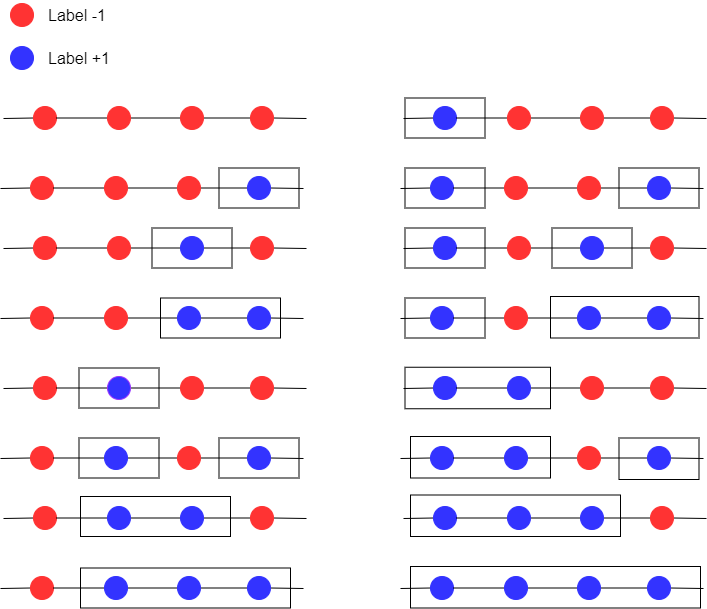

- For 5 points, there is a case when labels are interleaved and a third interval apppears. Therefore, 5 is the smallest break point.

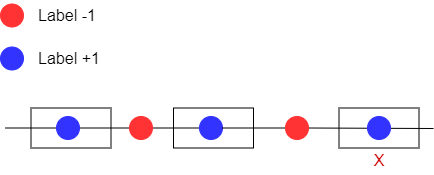

**Question 6:** The correct answer is [c] 5

## 7.

To find the growth function for this hypothesis set, we split the problem into three cases:
- Case 1: overlapping intervals
    - The two intervals can overlap or merge into a single continuous interval. This case is therefore equivalent to having 1 interval.
    - To create a single interval, we need to select the start and end points for the interval from N + 1 positions. The number of patterns generated by this case is $\binom{N + 1}{2}$.
- Case 2: non-overlapping intervals
    - The two intervals do not overlap, meaning they are completely separate.
    - To create two non-overlapping intervals, we need to choose the start and end points for the two intervals. The number of patterns generated by this case is $\binom{N + 1}{4}$.
- Case 3: there is no intervals.
    - This case account for the situation where neither interval contains any points, and there is only one pattern.

Hence, the total number of pattern is: $\binom{N + 1}{2} + \binom{N + 1}{4} + 1$.

**Question 7:** The correct answer is [c] $\binom{N + 1}{4} + \binom{N + 1}{2} + 1$

## 8.

In question 6, we found the smallest break point for 2-intervals model is 5. That is the case when labels are interleaved and a third interval appears. 

From there, we deduce that the smallest break point for M-intervals model appear when we consider the case when labels are interleaved and the M + 1 interval appears.

Thus, the smallest break point of this hypothesis set is $2M + 1$

**Question 8:** The correct answer is [d] $2M + 1$

# Convex Sets: The Triangle

## 9.

In the case of 7 points, we will randomly choose 7 points with no 3 points lie on the same line.

With N = 7, we have a maximum of $2^7 = 128$ dichotomies. However, we will only sketch representative case, and we get the following figure:

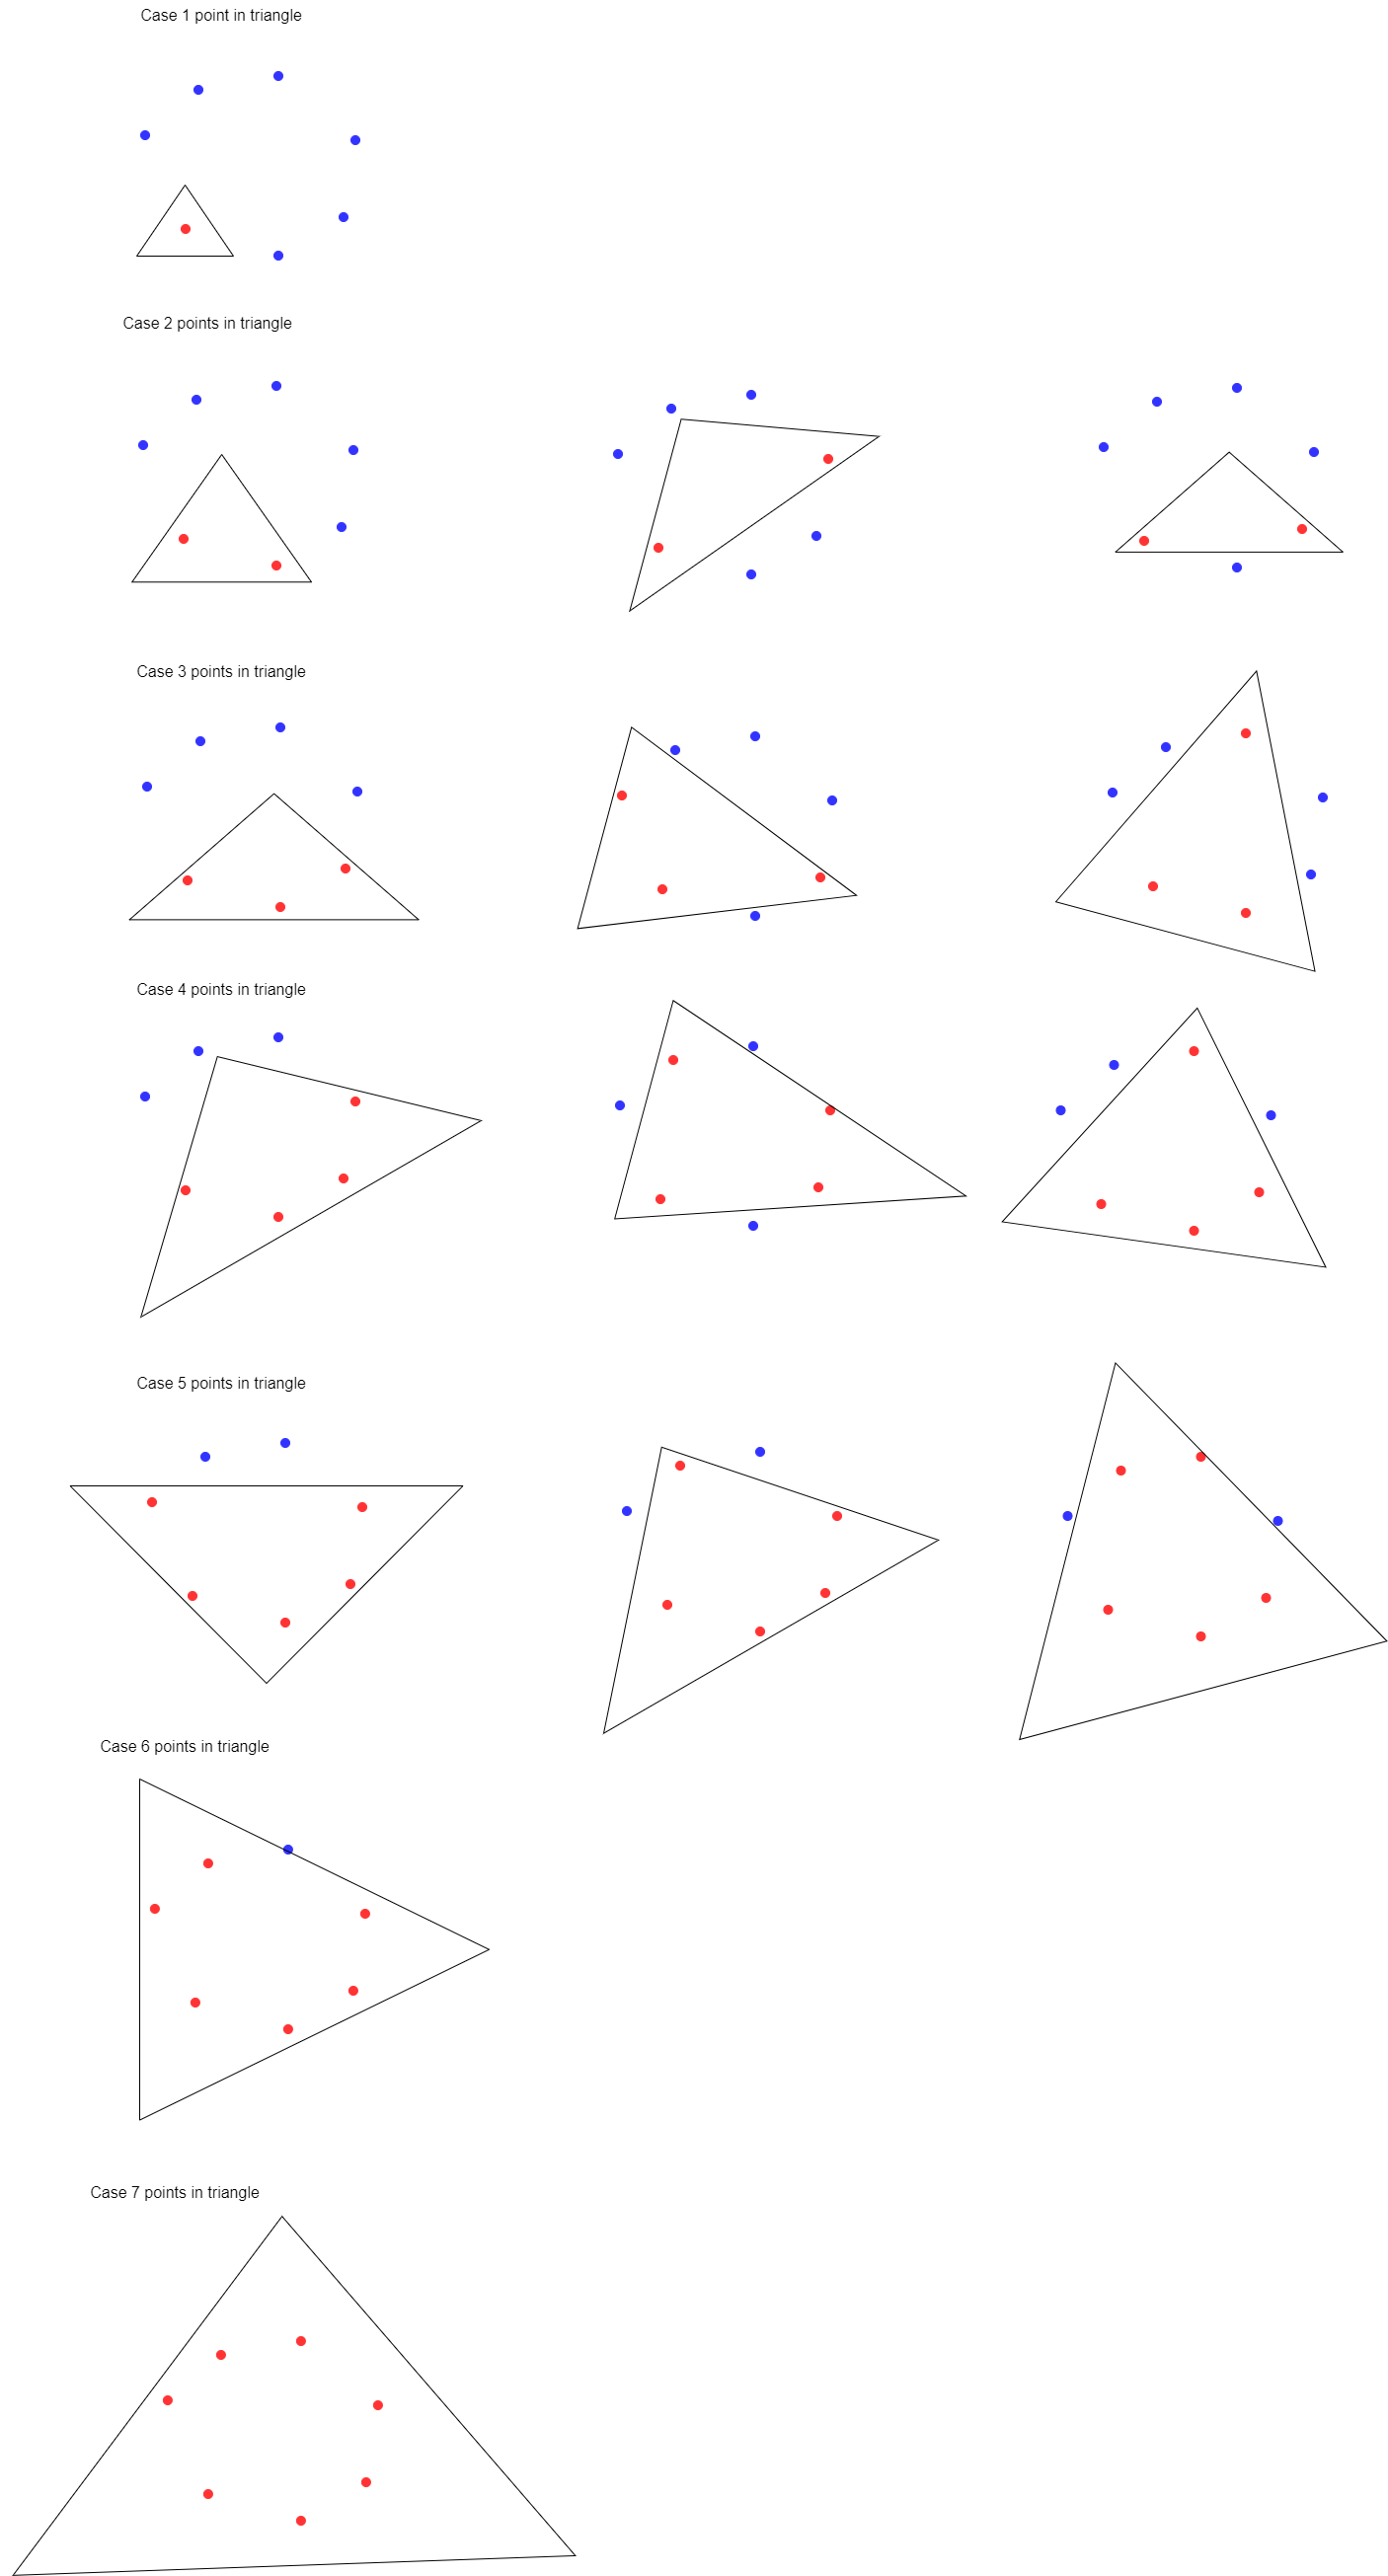

So, 7 randomly points can be shattered by this hypothesis.

We can similarly draw and prove the case of 1, 3, and 5 points.

Now let's check for the case of 8 points. When the label are interleaved, there is a point misplaced because it places inside the triangle but it is blue. Therefore, the smallest break point for this hypothesis is 8 points.

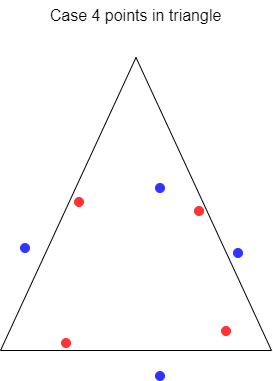

Hence, 7 is the largest number of point in $\R^2$ that can be shattered by this hypothesis set.

**Question 9:** The correct answer is [d] 7

# Non-Convex Sets: Concentric Circles

## 10.

Concentric circles are similar to the 1-interval with a and b being the start and end points respectively. For any set of points, the labels of the points only change when the sizes of the two circles change. Therefore the growth function of this hypothesis set is equal to the growth function of 1-interval plus 1 (in case the two circles have the same size).

Thus the growth function of this hypothesis is:
$$\binom{N + 1}{2} + 1$$

**Question 10:** The correct answer is [b] $\binom{N + 1}{2} + 1$

# Reference

[1]: "Learning From Data - Homework 3". *RPubs*.https://rpubs.com/giuliano_mega/376525. Accessed date: 15/11/2024.